# Part 1

In [44]:
import pandas as pd
import numpy as np
df_iris = pd.read_csv('Iris.csv')

In [45]:
df_iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df_iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
mean = df_iris.mean()

In [48]:
Sepal_Length = df_iris['Sepal_Length']
var1 = sum([(i - mean[0])**2 for i in Sepal_Length]) / Sepal_Length.size
Sepal_Width = df_iris['Sepal_Width']
var2 = sum([(i - mean[1])**2 for i in Sepal_Width]) / Sepal_Width.size
Petal_Length = df_iris['Petal_Length']
var3 = sum([(i - mean[2])**2 for i in Petal_Length]) / Petal_Length.size
Petal_Width = df_iris['Petal_Width']
var4 = sum([(i - mean[3])**2 for i in Petal_Width]) / Petal_Width.size
cov_naive =np.array([[var1,0,0,0],[0,var2,0,0],[0,0,var3,0],[0,0,0,var4]])
print(cov_naive)

[[0.68112222 0.         0.         0.        ]
 [0.         0.18675067 0.         0.        ]
 [0.         0.         3.09242489 0.        ]
 [0.         0.         0.         0.57853156]]


# part 3 : naive bayes with library


In [49]:
from sklearn import datasets
import pandas as pd
df_iris = pd.read_csv('Iris.csv')

In [50]:
df_iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
from sklearn.model_selection import train_test_split

X = df_iris[['Sepal_Length', 'Sepal_Width',
             'Petal_Length', 'Petal_Width']]

y = df_iris['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=8)

In [52]:
from sklearn.naive_bayes import GaussianNB   

clf = GaussianNB()  

# fitting the classifier
clf.fit(X_train, y_train);

In [53]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 86.7%


In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np
acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(acc)

print("\nwe are 95 percent confident that our accuracy is within: %.2f%% +- %.2f%%" %(np.mean(acc)*100, 2 * np.std(acc) / np.sqrt(5) *100))

[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]

we are 95 percent confident that our accuracy is within: 95.33% +- 2.39%


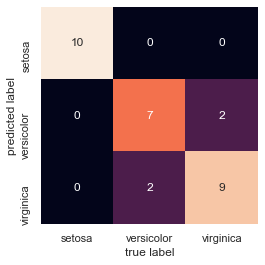

In [55]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
confusion_mtx = confusion_matrix(y_test, y_pred)
target=['setosa' , 'versicolor' , 'virginica']
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d',cbar=False ,
           xticklabels=target, yticklabels=target)
plt.xlabel('true label')
plt.ylabel('predicted label');


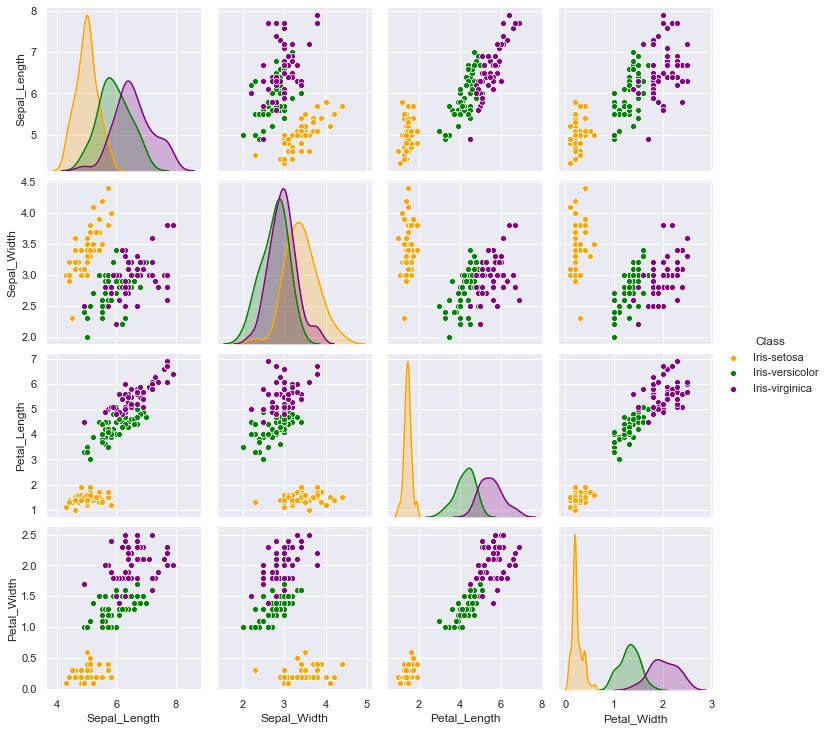

In [56]:
palette = {'Iris-setosa': 'orange', 'Iris-versicolor': 'green', 'Iris-virginica': 'purple'}

g = sns.pairplot(df_iris, vars = df_iris.columns[0:4], hue="Class", palette=palette)

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.78      0.78      0.78         9
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

